In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# csv파일에서 20만행의 데이터 앍어오기
df = pd.read_csv('NHIS_OPEN_GJ_2017_4.csv', encoding='cp949', nrows=200000)
df

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199772,199772,199996,1,45,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199773,199773,199997,2,30,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199774,199774,199998,1,55,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199775,199775,199999,1,40,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


In [5]:
# pivot테이블 생성 -> x축 신장, y축 체중, 혈당 평균값 
df_pivot_mean = pd.pivot_table(df, index='체중', columns='신장', values='식전혈당', aggfunc='mean')
df_pivot_mean

신장,130,135,140,145,150,155,160,165,170,175,180,185,190
체중,,,,,,,,,,,,,
25,NaN,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,100.666667,97.866667,95.454545,93.857143,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,98.333333,102.307692,98.179487,103.147541,94.889831,88.269231,95.400000,NaN,NaN,NaN,NaN,NaN,NaN
40,97.222222,102.202532,103.316832,98.272727,94.728675,91.487923,89.625000,99.818182,79.000000,NaN,NaN,NaN,NaN
45,NaN,104.250000,101.576065,99.411281,95.750840,92.428463,91.148865,92.428571,95.189189,89.000000,NaN,NaN,NaN
50,NaN,103.290323,104.383621,101.127876,97.547569,95.070941,93.155172,93.520183,94.881220,93.964286,87.142857,NaN,NaN
55,NaN,107.571429,106.992958,102.987261,100.595969,97.829453,96.218455,95.792356,95.433333,95.198413,91.479167,NaN,NaN
60,NaN,101.000000,110.614754,107.649883,103.006495,101.452903,100.601243,99.969986,98.872301,94.796967,92.330233,91.666667,NaN
65,NaN,NaN,107.291667,108.030928,105.960196,103.286121,103.347707,102.615167,99.774641,97.888346,96.444664,91.914286,NaN


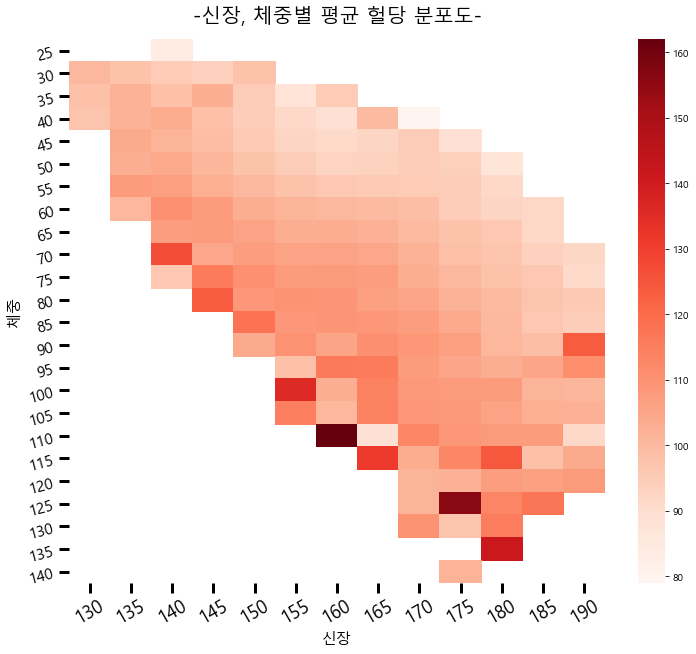

In [12]:
# heatmap - 값이 클수록 색깔이 진하다
# 2가지 특성에 따른 데이터 분포
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_pivot_mean, cmap='Reds', ax=ax)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('-신장, 체중별 평균 헐당 분포도-', fontsize=20, y=1.02)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)
plt.show()

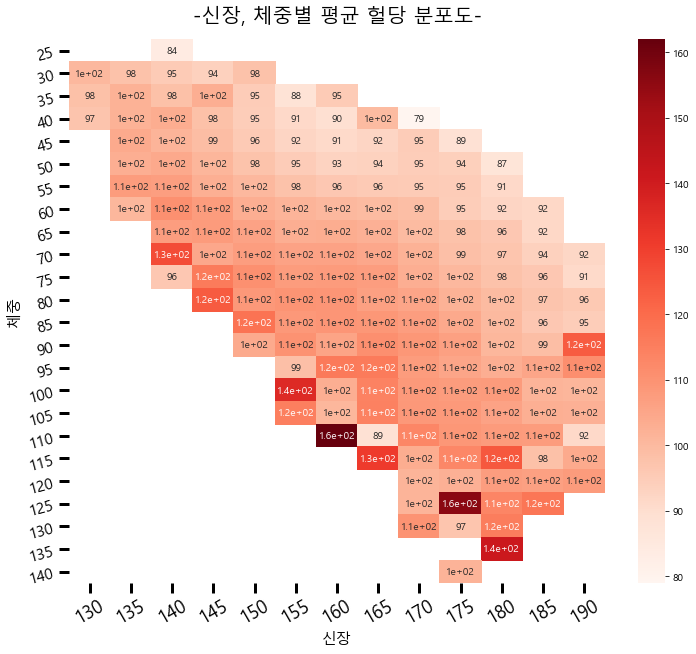

In [15]:
# 이번에는 annot속성을 사용해 heatmap의 각 값을 텍스트로 출력해보자
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_pivot_mean, cmap='Reds', annot=True, ax=ax)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('-신장, 체중별 평균 헐당 분포도-', fontsize=20, y=1.02)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)
plt.show()

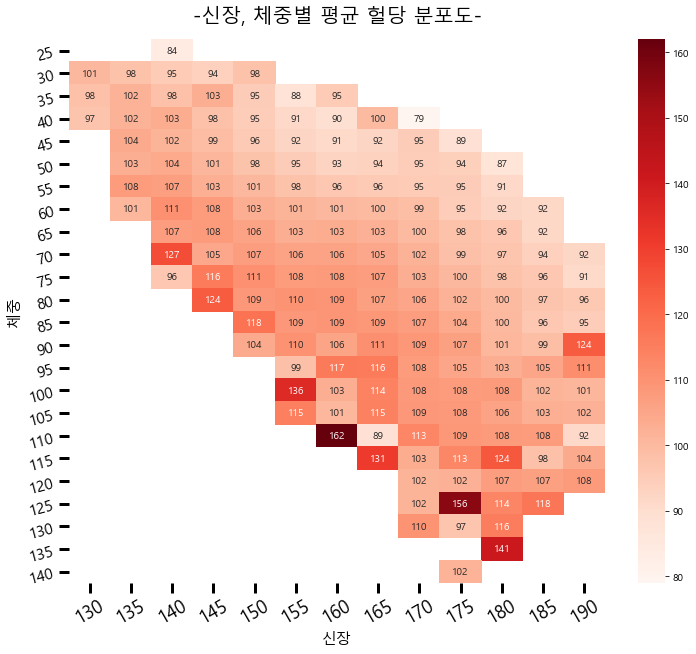

In [16]:
# fmt속성으로 출력될 값의 서식을 설정
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_pivot_mean, cmap='Reds', annot=True, fmt='.0f', ax=ax)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('-신장, 체중별 평균 헐당 분포도-', fontsize=20, y=1.02)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)
plt.show()

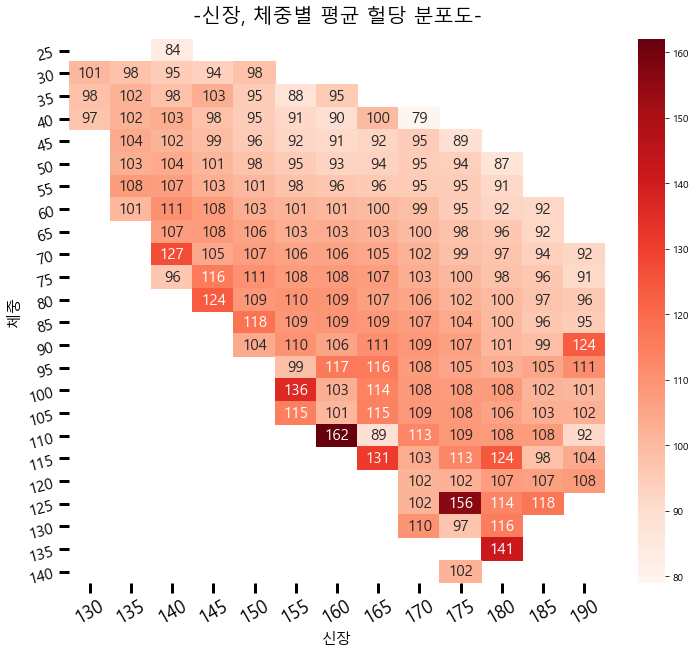

In [18]:
# annot_kws를 사용해 출력될 글씨의 크기를 지정
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_pivot_mean, cmap='Reds', annot=True, annot_kws={'size':15}, fmt='.0f', ax=ax)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('-신장, 체중별 평균 헐당 분포도-', fontsize=20, y=1.02)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)
plt.show()

In [19]:
df['식전혈당'] = df['식전혈당'] * 40
df_pivot_mean = pd.pivot_table(df, index='체중', columns='신장', values='식전혈당', aggfunc='mean')
df_pivot_mean

신장,130,135,140,145,150,155,160,165,170,175,180,185,190
체중,,,,,,,,,,,,,
25,NaN,NaN,3360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4026.666667,3914.666667,3818.181818,3754.285714,3920.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,3933.333333,4092.307692,3927.179487,4125.901639,3795.593220,3530.769231,3816.000000,NaN,NaN,NaN,NaN,NaN,NaN
40,3888.888889,4088.101266,4132.673267,3930.909091,3789.147005,3659.516908,3585.000000,3992.727273,3160.000000,NaN,NaN,NaN,NaN
45,NaN,4170.000000,4063.042596,3976.451234,3830.033595,3697.138516,3645.954584,3697.142857,3807.567568,3560.000000,NaN,NaN,NaN
50,NaN,4131.612903,4175.344828,4045.115044,3901.902763,3802.837625,3726.206897,3740.807324,3795.248796,3758.571429,3485.714286,NaN,NaN
55,NaN,4302.857143,4279.718310,4119.490446,4023.838779,3913.178106,3848.738182,3831.694224,3817.333333,3807.936508,3659.166667,NaN,NaN
60,NaN,4040.000000,4424.590164,4305.995316,4120.259817,4058.116129,4024.049734,3998.799454,3954.892048,3791.878686,3693.209302,3666.666667,NaN
65,NaN,NaN,4291.666667,4321.237113,4238.407838,4131.444824,4133.908263,4104.606698,3990.985643,3915.533822,3857.786561,3676.571429,NaN


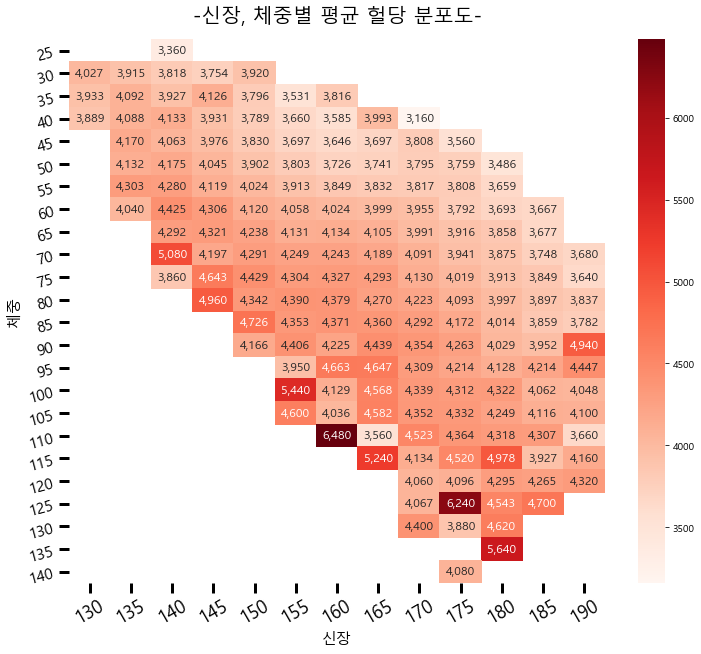

In [20]:
# fmt=',.of'를 지정하여 1000단위마다 콤마(,)를 찍도록 설정한다
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_pivot_mean, cmap='Reds', annot=True, annot_kws={'size':12}, fmt=',.0f', ax=ax)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('-신장, 체중별 평균 헐당 분포도-', fontsize=20, y=1.02)
ax.tick_params(axis='x', rotation=30, labelsize=18, length=10, width=3)
ax.tick_params(axis='y', rotation=15, labelsize=15, length=10, width=3)
plt.show()